# Exercise 5

## Reinforcement Learning


---

## Overview

Welcome to this Excercise. We are now going to use our new skills to build our first  Reinforcement Learning Model. 




In [88]:
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.5322,NaN,0.8450,NaN,NaN,8.3272,1.2778,NaN,16.2747,28.3256,...,NaN,973700,NaN,2738600,13458200,NaN,3033493,NaN,1055700,NaN
2000-01-04,40.2068,NaN,0.7737,NaN,NaN,8.0893,1.2708,NaN,14.9094,26.8927,...,NaN,1201700,NaN,425200,14510800,NaN,3315031,NaN,522450,NaN
2000-01-05,37.7128,NaN,0.7851,NaN,NaN,8.0745,1.3889,NaN,15.2042,27.2852,...,NaN,1184600,NaN,500200,17485000,NaN,4642602,NaN,612225,NaN
2000-01-06,36.2768,NaN,0.7171,NaN,NaN,8.3570,1.3750,NaN,15.3283,26.5393,...,NaN,1307700,NaN,344100,19461600,NaN,3947658,NaN,263925,NaN
2000-01-07,39.2999,NaN,0.7511,NaN,NaN,8.4462,1.4514,NaN,16.0730,27.2852,...,NaN,1728000,NaN,469500,16603800,NaN,6063647,NaN,333900,NaN


In [92]:
historical_prices = historical_prices.loc[:, ~historical_prices.columns.duplicated()]

In [96]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 23.4 MB


In [99]:
historical_prices2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 23.4+ MB


In [94]:
historical_prices.to_csv('historical_prices.csv')

In [100]:
historical_prices2 = pd.read_csv('historical_prices.csv')
historical_prices2['Date'] = pd.to_datetime(historical_prices2['Date'])
historical_prices2.set_index('Date', inplace=True)
historical_prices2.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.5322,NaN,0.8450,NaN,NaN,8.3272,1.2778,NaN,16.2747,28.3256,...,NaN,11.4279,NaN,6.9076,18.1810,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2068,NaN,0.7737,NaN,NaN,8.0893,1.2708,NaN,14.9094,26.8927,...,NaN,10.9986,NaN,7.0667,17.8328,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7128,NaN,0.7851,NaN,NaN,8.0745,1.3889,NaN,15.2042,27.2852,...,NaN,11.5812,NaN,7.3394,18.8050,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.2768,NaN,0.7171,NaN,NaN,8.3570,1.3750,NaN,15.3283,26.5393,...,NaN,12.1230,NaN,7.2712,19.7771,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.2999,NaN,0.7511,NaN,NaN,8.4462,1.4514,NaN,16.0730,27.2852,...,NaN,11.7243,NaN,7.2712,19.7191,NaN,4.4468,NaN,23.5139,NaN


In [82]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   

MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()

# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index

# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 5, 15, 20]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)

# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)

# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]

# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']


total_returns  = test_data[target]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())


# # Plotting the cumulative returns
# cum_returns.plot()

# # Customizing the plot
# plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Cumulative Return', fontsize=14)
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend(title_fontsize='13', fontsize='11')

# # Display the plot
# plt.show()

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())

#calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

[*********************100%%**********************]  501 of 501 completed

1 Failed download:
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")


In [103]:
df_tmp = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [107]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6120 entries, 2000-01-03 to 2024-04-30
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 23.4 MB


In [105]:
historical_prices

F_1_d_returns_Ind  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                    
A      2000-02-01                  1       0.0727       0.0489        0.0299   
       2000-02-02                  1       0.0775       0.1199        0.1250   
       2000-02-03                  0       0.0163       0.1361        0.1670   
       2000-02-04                  1      -0.0193       0.1203        0.1275   
       2000-02-07                  0       0.0426       0.2011        0.1627   
...                              ...          ...          ...           ...   
ZTS    2017-01-12                  1       0.0015      -0.0100        0.0055   
       2017-01-13                  0       0.0066      -0.0067        0.0117   
       2017-01-17                  1      -0.0097      -0.0135       -0.0008   
       2017-01-18                  1       0.0035      -0.0097       -0.0070   
       2017-01-19                  1       0.0038       0.0055       -0.0021   

                   20_d_returns  
Ticker Date                      
A      2000-02-01       -0.0139  
       2000-02-02        0.1504  
       2000-02-03        0.2465  
       2000-02-04        0.2708  
       2000-02-07        0.2231  
...                         ...  
ZTS    2017-01-12        0.0458  
       2017-01-13        0.0570  
       2017-01-17        0.0172  
       2017-01-18        0.0180  
       2017-01-19        0.0232  

[1795319 rows x 5 columns]

In [110]:
# Convert the comparison date to datetime
cutoff_date = pd.to_datetime('2024-03-31')
historical_prices[historical_prices.index.get_level_values('Date') >cutoff_date]

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,145.2904,15.4100,169.7997,177.4573,163.3700,110.9482,92.3100,336.3866,502.0900,195.8410,...,272.5286,35.3207,106.2857,52.7427,116.0474,128.3043,139.7831,129.4622,301.0000,166.1499
2024-04-02,143.9029,14.4000,168.6113,177.3886,160.1100,110.8789,91.4900,333.6988,499.2100,194.1079,...,266.9174,35.1916,104.9890,53.5346,118.3190,127.7856,140.0219,128.1851,296.5000,164.1504
2024-04-03,143.4637,14.1600,169.4202,174.0900,159.3400,110.1465,92.2300,329.5531,497.0100,194.5860,...,268.4024,34.7049,106.1460,53.5445,118.3388,128.5237,138.3302,129.7217,292.7500,162.1210
2024-04-04,141.0782,13.8300,168.5913,164.8323,158.8400,108.9884,91.0900,327.7580,487.1100,191.1895,...,265.4324,34.4069,105.8468,53.2277,118.7554,126.9179,135.6136,127.2771,292.9600,164.6577
2024-04-05,143.8530,13.7600,169.3503,166.8939,161.7700,110.0673,94.9000,330.2672,485.1200,193.9884,...,270.0370,34.3572,107.1834,52.9902,120.3921,127.9353,135.4345,127.0476,290.3800,164.9960
2024-04-08,144.1924,13.9000,168.2218,166.6976,160.2700,109.3942,94.5500,329.0770,484.2800,195.9107,...,266.4988,34.1884,105.7171,53.5346,119.5787,127.4166,134.5588,126.4090,296.8700,164.8269
2024-04-09,147.1269,13.9500,169.4402,167.0314,162.6600,111.2947,91.2200,331.7053,492.5500,203.3113,...,264.2164,34.7943,106.2159,53.8217,120.2037,128.5935,136.3500,129.1130,306.1700,166.2693
2024-04-10,143.8930,13.4100,167.5527,165.9417,160.2800,110.0376,92.1900,322.9835,487.2200,195.5522,...,262.9507,33.3739,103.9716,53.2080,121.2154,127.8555,137.2754,127.4368,299.9100,162.3498
2024-04-11,144.7314,13.6200,174.8029,164.4592,165.4200,110.3148,91.3100,323.7701,484.2800,197.8530,...,259.4424,33.4236,104.5900,52.9506,120.8087,128.4539,137.6535,127.2372,297.5400,161.8823


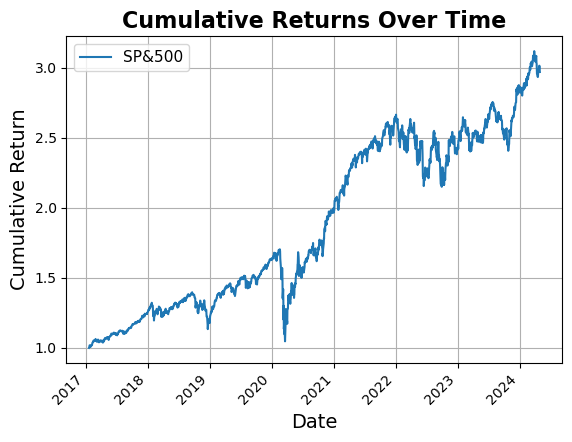

The CAGR is: 16.04%


Sharpe Ratio of Strategy: 0.85


## Demo 1


In [2]:
class Fish:
    def __init__(self, color, size):
        self.color = color
        self.size = size

    def __repr__(self):
        return f"Fish(color='{self.color}', size='{self.size}')"

# List of fish attributes
fish_attributes = [
    ("red", "small"),
    ("blue", "medium"),
    ("green", "large"),
    ("yellow", "small"),
    ("orange", "medium")
]

# List to hold fish instances
fish_list = []

# Create instances in a for loop
for color, size in fish_attributes:
    fish = Fish(color, size)
    fish_list.append(fish)

# Print the list of fish instances
for fish in fish_list:
    print(fish)

Fish(color='red', size='small')
Fish(color='blue', size='medium')
Fish(color='green', size='large')
Fish(color='yellow', size='small')
Fish(color='orange', size='medium')


## Demo 2

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
import time

# Create the environment with render mode set to 'human'
env = gym.make('CartPole-v1', render_mode='human')

# Create the agent with verbose turned off
agent = DQN('MlpPolicy', env, verbose=0)

# Train the agent
agent.learn(total_timesteps=10000)

# Test the trained agent
obs, _ = env.reset()
done = False
try:
    while not done:
        action, _ = agent.predict(obs)
        obs, reward, done, _, _ = env.step(action)
        env.render()
        time.sleep(0.05)  # Add a small delay to see the rendering

except SystemExit:
    pygame.quit()
env.close()

# Demo 3

In [3]:

import random
import numpy as np

from collections import defaultdict

import gymnasium as gym
#from gymnasium import spaces
#from gymnasium import Env

class SimpleGridEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, grid_size=5):
        super(SimpleGridEnv, self).__init__()
        self.grid_size = grid_size
        self.action_space = gym.spaces.Discrete(4)  # 4 actions: up, down, left, right
        self.observation_space = gym.spaces.MultiDiscrete([grid_size, grid_size])
        self.state = None
        self.goal = (grid_size - 1, grid_size - 1)
    
    def reset(self):
        self.state = (0, 0)
        return np.array(self.state, dtype=np.int32)
    
    def step(self, action):
        x, y = self.state
        
        if action == 0:  # up
            x = max(0, x - 1)
        elif action == 1:  # down
            x = min(self.grid_size - 1, x + 1)
        elif action == 2:  # left
            y = max(0, y - 1)
        elif action == 3:  # right
            y = min(self.grid_size - 1, y + 1)
        
        self.state = (x, y)
        
        done = self.state == self.goal
        reward = 1 if done else -0.1
        
        return np.array(self.state, dtype=np.int32), reward, done, {}
    
    def render(self, mode='human'):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:] = '.'
        grid[self.goal] = 'G'
        x, y = self.state
        grid[x, y] = 'A'
        print("\n".join(["".join(row) for row in grid]))
        print()

class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.env = env
        self.q_table = defaultdict(lambda: np.zeros(env.action_space.n))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
    
    def choose_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

def train_agent(env, agent, episodes=1000):
    for episode in range(episodes):
        state = tuple(env.reset())
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = tuple(next_state)
            agent.learn(state, action, reward, next_state)
            state = next_state
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1} completed")


if __name__ == "__main__":
    
    env = SimpleGridEnv()
    agent = QLearningAgent(env)
    train_agent(env, agent, episodes=1000)

    state = tuple(env.reset())
    done = False
    while not done:
        action = agent.choose_action(state)
        state, reward, done, _ = env.step(action)
        state = tuple(state)
        env.render()

Episode 100 completed
Episode 200 completed
Episode 300 completed
Episode 400 completed
Episode 500 completed
Episode 600 completed
Episode 700 completed
Episode 800 completed
Episode 900 completed
Episode 1000 completed
.....
A....
.....
.....
....G

.....
.A...
.....
.....
....G

.....
..A..
.....
.....
....G

.....
.....
..A..
.....
....G

.....
.....
...A.
.....
....G

.....
.....
....A
.....
....G

.....
.....
.....
....A
....G

.....
.....
.....
.....
....A



# Demo 4

In [51]:
import gymnasium as gym
import numpy as np
import pandas as pd
from stable_baselines3 import DQN
from gymnasium import spaces

In [53]:
# Generate the training dataset
np.random.seed(42)
days = 100
milk_consumption = np.random.uniform(0, 10, size=days)  # Random milk consumption between 0 and 10 ounces
discomfort = (milk_consumption > 5).astype(int)  # Discomfort turns to 1 if consumption > 5 ounces

# Create a DataFrame for the training dataset
data = pd.DataFrame({
    'day': range(1, days + 1),
    'milk_consumption': milk_consumption,
    'discomfort': discomfort
})

# Generate the testing dataset
np.random.seed(24)
days_test = 50
milk_consumption_test = np.random.uniform(0, 10, size=days_test)  # Random milk consumption between 0 and 10 ounces
discomfort_test = (milk_consumption_test > 5).astype(int)  # Discomfort turns to 1 if consumption > 5 ounces



# Create a DataFrame for the testing dataset
data_test = pd.DataFrame({
    'day': range(1, days_test + 1),
    'milk_consumption': milk_consumption_test,
    'discomfort': discomfort_test
})

In [55]:

# Define the custom environment for milk consumption
class MilkConsumptionEnv(gym.Env):
    def __init__(self, data):
        super(MilkConsumptionEnv, self).__init__()
        self.data = data
        self.current_day = 0
        self.action_space = spaces.Discrete(2)  # 0: consume less milk, 1: consume more milk
        self.observation_space = spaces.Box(low=0, high=10, shape=(1,), dtype=np.float32)
        
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_day = 0
        obs = np.array([self.data.iloc[self.current_day]['milk_consumption']], dtype=np.float32)
        return obs, {}
    
    def step(self, action):
        self.current_day += 1
        
        if action == 0:  # consume less milk
            next_obs = max(0, self.data.iloc[self.current_day]['milk_consumption'] - 1)
        else:  # consume more milk
            next_obs = min(10, self.data.iloc[self.current_day]['milk_consumption'] + 1)
        
        next_obs = np.array([next_obs], dtype=np.float32)
        done = self.current_day >= len(self.data) - 1
        
        # Reward is -1 if discomfort (1), 0 otherwiseS
        reward = -1 if self.data.iloc[self.current_day]['discomfort'] == 1 else 0
        
        return next_obs, reward, done, False, {}
    
    def render(self):
        pass
    
    def close(self):
        pass

In [57]:
# Initialize the environment with the training dataset
env = MilkConsumptionEnv(data)

# Create the agent using DQN
agent = DQN('MlpPolicy', env, verbose=0)

# Train the agent
agent.learn(total_timesteps=10000)


In [58]:

# Initialize the testing environment with the new dataset
env_test = MilkConsumptionEnv(data_test)

# Variables to keep track of correct predictions
correct_predictions = 0
total_predictions = 0

# Test the trained agent on the new dataset
obs, _ = env_test.reset()
done = False
while not done:
    action, _ = agent.predict(obs)
    obs, reward, done, _, _ = env_test.step(action)
    
    # The agent's action is based on whether it predicts discomfort or not
    predicted_discomfort = 1 if obs[0] > 5 else 0
    
    # Compare prediction with actual discomfort
    actual_discomfort = env_test.data.iloc[env_test.current_day - 1]['discomfort']
    if predicted_discomfort == actual_discomfort:
        correct_predictions += 1
    total_predictions += 1

# Calculate prediction accuracy
accuracy = correct_predictions / total_predictions * 100
print(f"Prediction accuracy on the new dataset: {accuracy:.2f}%")



Prediction accuracy on the new dataset: 61.22%


# Demo 4

In [64]:
import random
import numpy as np
import pandas as pd
from collections import defaultdict
import gymnasium as gym
from gymnasium import spaces

# Define the custom gym environment
class ReturnEnv(gym.Env):
    def __init__(self, df):
        super(ReturnEnv, self).__init__()
        
        # Define action and observation space
        self.action_space = spaces.Discrete(2)  # 0 or 1
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Initialize dataframe
        self.df = df
        self.current_step = 0
        
    def reset(self):
        self.current_step = 0
        state = self.df.iloc[self.current_step][['1_d_returns']].values
        return state
    
    def step(self, action):
        target = self.df.iloc[self.current_step]['Target_Returns']
        
        # Reward if action matches target return
        reward = 1 if action == target else -1
        
        self.current_step += 1
        done = self.current_step >= len(self.df)
        
        if not done:
            next_state = self.df.iloc[self.current_step][['1_d_returns']].values
        else:
            next_state = np.zeros(2)
        
        return next_state, reward, done, {}

In [ ]:
# Q-learning Agent
class QLearningAgent:
    def __init__(self, action_space, state_space, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.action_space = action_space
        self.state_space = state_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))
    
    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return self.action_space.sample()  # explore
        else:
            return np.argmax(self.q_table[str(state)])  # exploit
    
    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[str(next_state)])
        td_target = reward + self.gamma * self.q_table[str(next_state)][best_next_action]
        td_error = td_target - self.q_table[str(state)][action]
        self.q_table[str(state)][action] += self.alpha * td_error


In [71]:

def main():
    # Example data
    df = pd.DataFrame({
        'Target_Returns': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
        '1_d_returns': [0.062030, -0.038076, 0.050, 0.030, -0.020, 0.062030, -0.038076, 0.050, 0.030, -0.020]
    })


    # Create environment and agent
    env = ReturnEnv(df)
    agent = QLearningAgent(env.action_space, env.observation_space)

    # Training loop
    n_episodes = 1000
    for episode in range(n_episodes):
        state = env.reset()
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update(state, action, reward, next_state)
            state = next_state

    print("Training finished.")

    # Evaluation
    state = env.reset()
    done = False
    step = 1

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        
        # Print detailed step information
        print(f"Action: {action}, Target Return: {env.df['Target_Returns'].values[step-1]}, Reward: {reward}, Step: {step}, State: {state}, Next State: {next_state}")
        
        state = next_state
        step += 1

if __name__ == "__main__":
    main()

Training finished.
Action: 1, Target Return: 1, Reward: 1, Step: 1, State: [0.06203  0.133681], Next State: [-0.038076 -0.097744]
Action: 0, Target Return: 0, Reward: 1, Step: 2, State: [-0.038076 -0.097744], Next State: [0.05 0.07]
Action: 1, Target Return: 1, Reward: 1, Step: 3, State: [0.05 0.07], Next State: [0.03 0.04]
Action: 1, Target Return: 1, Reward: 1, Step: 4, State: [0.03 0.04], Next State: [-0.02 -0.01]
Action: 0, Target Return: 0, Reward: 1, Step: 5, State: [-0.02 -0.01], Next State: [0.06203  0.133681]
Action: 1, Target Return: 1, Reward: 1, Step: 6, State: [0.06203  0.133681], Next State: [-0.038076 -0.097744]
Action: 0, Target Return: 0, Reward: 1, Step: 7, State: [-0.038076 -0.097744], Next State: [0.05 0.07]
Action: 1, Target Return: 1, Reward: 1, Step: 8, State: [0.05 0.07], Next State: [0.03 0.04]
Action: 1, Target Return: 1, Reward: 1, Step: 9, State: [0.03 0.04], Next State: [-0.02 -0.01]
Action: 0, Target Return: 0, Reward: 1, Step: 10, State: [-0.02 -0.01], Ne

# DEMO 5

# DEMO 5

In [ ]:
import random
import numpy as np
import pandas as pd
from collections import defaultdict
import gymnasium as gym
from gymnasium import spaces

# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
#import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the custom gym environment
class ReturnEnv(gym.Env):
    def __init__(self, df):
        super(ReturnEnv, self).__init__()
        
        # Define action and observation space
        self.action_space = spaces.Discrete(2)  # 0 or 1
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(4,), dtype=np.float32)
        
        # Initialize dataframe
        self.df = df.reset_index()
        self.current_step = 0
        
    def reset(self):
        self.current_step = 0
        state = self.df.iloc[self.current_step][['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']].values
        return state
    
    def step(self, action):
        target = self.df.iloc[self.current_step]['F_1_d_returns_Ind']
        
        # Reward if action matches target return
        reward = 1 if action == target else -1
        
        self.current_step += 1
        done = self.current_step >= len(self.df)
        
        if not done:
            next_state = self.df.iloc[self.current_step][['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']].values
        else:
            next_state = np.zeros(4)
        
        return next_state, reward, done, {}

# Q-learning Agent
class QLearningAgent:
    def __init__(self, action_space, state_space, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.action_space = action_space
        self.state_space = state_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))
    
    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return self.action_space.sample()  # explore
        else:
            return np.argmax(self.q_table[str(state)])  # exploit
    
    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[str(next_state)])
        td_target = reward + self.gamma * self.q_table[str(next_state)][best_next_action]
        td_error = td_target - self.q_table[str(state)][action]
        self.q_table[str(state)][action] += self.alpha * td_error

def print_predictions(env, agent, df, dataset_name):
    state = env.reset()
    done = False
    step = 1
    predictions = []

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        
        # Record prediction details
        predictions.append((env.current_step - 1, action, reward, state, next_state))

        state = next_state
        step += 1
    
    # Print predictions
    print(f"\nPredictions for {dataset_name} data:")
    for idx, action, reward, state, next_state in predictions:
        print(f"Action: {action}, Target Return: {env.df.loc[idx]['F_1_d_returns_Ind']}, Reward: {reward}, Step: {step}, State: {state}, Next State: {next_state}")

    # Add predictions to DataFrame
    pred_df = pd.DataFrame(predictions, columns=['Index', 'Action', 'Reward', 'State', 'Next_State'])
    pred_df = pred_df.set_index('Index')
    df = df.reset_index().merge(pred_df[['Action']], left_index=True, right_index=True, how='left').set_index(df.index.names)
    return df

def trading_strategy(y_pred):
    if y_pred >0.5:
        return  1 # Go long
    else:
        return  0  
    
def main():
    # Training dataset

    # # historical_prices = createHistoricalData()
    historical_prices = pd.read_csv('historical_prices.csv')
    historical_prices['Date'] = pd.to_datetime(historical_prices['Date'])
    historical_prices.set_index('Date', inplace=True)
    calendar_returns, ann_returns, X_train_scaled, X_test_scaled, y_train, y_test, total_returns = createHistoricalReturns(historical_prices)
    df  = pd.merge(y_train, X_train_scaled, left_index=True, right_index=True)
    df2 = pd.merge(y_test,  X_test_scaled,  left_index=True, right_index=True)

    # df = pd.DataFrame({
    #     '1_d_returns': [0.0727, 0.0775, 0.0163, -0.0193, 0.0426],
    #     '5_d_returns': [0.0489, 0.1199, 0.1361, 0.1203, 0.2011],
    #     '15_d_returns': [0.0299, 0.1250, 0.1670, 0.1275, 0.1627],
    #     '20_d_returns': [-0.0139, 0.1504, 0.2465, 0.2708, 0.2231],
    #     'F_1_d_returns_Ind': [1, 1, 0, 1, 0]
    # }, index=pd.MultiIndex.from_tuples([
    #     ('A', '2000-02-01'),
    #     ('A', '2000-02-02'),
    #     ('A', '2000-02-03'),
    #     ('A', '2000-02-04'),
    #     ('A', '2000-02-07')
    # ], names=['Ticker', 'Date']))

    # # Evaluation dataset
    # df2 = pd.DataFrame({
    #     '1_d_returns': [0.0334, 0.0589, 0.0110, -0.0123, 0.0321],
    #     '5_d_returns': [0.0450, 0.1099, 0.1261, 0.1103, 0.2015],
    #     '15_d_returns': [0.0239, 0.1150, 0.1570, 0.1175, 0.1527],
    #     '20_d_returns': [-0.0135, 0.1404, 0.2365, 0.2608, 0.2131],
    #     'F_1_d_returns_Ind': [1, 0, 1, 0, 1]
    # }, index=pd.MultiIndex.from_tuples([
    #     ('A', '2000-02-08'),
    #     ('A', '2000-02-09'),
    #     ('A', '2000-02-10'),
    #     ('A', '2000-02-11'),
    #     ('A', '2000-02-14')
    # ], names=['Ticker', 'Date']))

    # Create environment and agent for training
    env = ReturnEnv(df)
    agent = QLearningAgent(env.action_space, env.observation_space)

    # Training loop
    n_episodes = 1
    for episode in range(n_episodes):
        state = env.reset()
        done = False
        
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update(state, action, reward, next_state)
            state = next_state

    print("Training finished.")

    # Print predictions for training data and add them back to df
    df = print_predictions(env, agent, df, "training")

    # Create environment for evaluation
    eval_env = ReturnEnv(df2)

    # Print predictions for evaluation data and add them back to df2
    df2 = print_predictions(eval_env, agent, df2, "evaluation")

    #print("\nTraining Data with Predictions:")
    #print(df)
    
    #print("\nEvaluation Data with Predictions:")
    #print(df2)

    y_test_and_pred = pd.merge(df2, total_returns, left_index=True, right_index=True)
    model_name = 'RL'
    # Define trading strategy based on RSI

            
    # Apply trading strategy to each RSI value
    y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
    # Create Returns for each Trade
    y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 

    # Compute the daily mean of all stocks. This will be our equal weighted benchmark
    daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

    # Convert daily returns to cumulative returns
    cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

    # Calculate the number of years in the dataset
    number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

    ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
    beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

    ratio = ending_value/beginning_value
    # Compute the Compound Annual Growth Rate (CAGR)
    cagr = round((ratio**(1/number_of_years)-1)*100,2)

    print(f'The CAGR is: {cagr}%')

    # Compute the Sharpe Ratio by annualizing the daily mean and the daily std
    average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
    stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

    # Compute the Sharpe Ratio and print it out
    sharpe  = average_daily_return/stand_dev_dail_return

    print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')
if __name__ == "__main__":
    main()




# DEMO 6

In [1]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [3]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [4]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed

1 Failed download:
['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1714536000")


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8440  NaN  NaN 8.3272 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7728  NaN  NaN 8.0893 1.2708 NaN 14.9094 26.8926   
2000-01-05   37.7128 NaN 0.7842  NaN  NaN 8.0744 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7163  NaN  NaN 8.3570 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7502  NaN  NaN 8.4462 1.4514 NaN 16.0730 27.2852   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3006 columns]

In [5]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.5322 NaN 0.8440  NaN  NaN 8.3272 1.2778 NaN 16.2747 28.3256   
2000-01-04   40.2068 NaN 0.7728  NaN  NaN 8.0893 1.2708 NaN 14.9094 26.8926   
2000-01-05   37.7128 NaN 0.7842  NaN  NaN 8.0744 1.3889 NaN 15.2042 27.2852   
2000-01-06   36.2768 NaN 0.7163  NaN  NaN 8.3570 1.3750 NaN 15.3283 26.5393   
2000-01-07   39.2999 NaN 0.7502  NaN  NaN 8.4462 1.4514 NaN 16.0730 27.2852   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.4279  NaN 6.9076 18.0358 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 10.9986  NaN 7.0667 17.6904 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.5812  NaN 7.3394 18.6548 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.1230  NaN 7.2712 19.6192 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.7243  NaN 7.2712 19.5616 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 501 columns]

In [6]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.5322,NaN,0.8440,NaN,NaN,8.3272,1.2778,NaN,16.2747,28.3256,...,NaN,11.4279,NaN,6.9076,18.0358,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2068,NaN,0.7728,NaN,NaN,8.0893,1.2708,NaN,14.9094,26.8926,...,NaN,10.9986,NaN,7.0667,17.6904,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7128,NaN,0.7842,NaN,NaN,8.0744,1.3889,NaN,15.2042,27.2852,...,NaN,11.5812,NaN,7.3394,18.6548,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.2768,NaN,0.7163,NaN,NaN,8.3570,1.3750,NaN,15.3283,26.5393,...,NaN,12.1230,NaN,7.2712,19.6192,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.2999,NaN,0.7502,NaN,NaN,8.4462,1.4514,NaN,16.0730,27.2852,...,NaN,11.7243,NaN,7.2712,19.5616,NaN,4.4468,NaN,23.5139,NaN


In [7]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [8]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=498)

In [9]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [11]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [15]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [82]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 5, 15, 20]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01         0.0775       0.0727       0.0489        0.0299   
       2000-02-02         0.0163       0.0775       0.1199        0.1250   
       2000-02-03        -0.0193       0.0163       0.1361        0.1670   
       2000-02-04         0.0426      -0.0193       0.1203        0.1275   
       2000-02-07        -0.0063       0.0426       0.2011        0.1627   

                   20_d_returns  
Ticker Date                      
A      2000-02-01       -0.0139  
       2000-02-02        0.1504  
       2000-02-03        0.2465  
       2000-02-04        0.2708  
       2000-02-07        0.2231

In [83]:
# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01         0.0775       0.0727       0.0489        0.0299   
       2000-02-02         0.0163       0.0775       0.1199        0.1250   
       2000-02-03        -0.0193       0.0163       0.1361        0.1670   
       2000-02-04         0.0426      -0.0193       0.1203        0.1275   
       2000-02-07        -0.0063       0.0426       0.2011        0.1627   

                   20_d_returns  F_1_d_returns_Ind  
Ticker Date                                         
A      2000-02-01       -0.0139                  1  
       2000-02-02        0.1504                  1  
       2000-02-03        0.2465                  0  
       2000-02-04        0.2708                  1  
       2000-02-07        0.2231                  0

In [84]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date
split_date = pd.Timestamp('2024-04-11')
split_date

Timestamp('2024-04-11 00:00:00')

In [85]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

In [86]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns']


total_returns  = test_data[target]

features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [87]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [88]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())

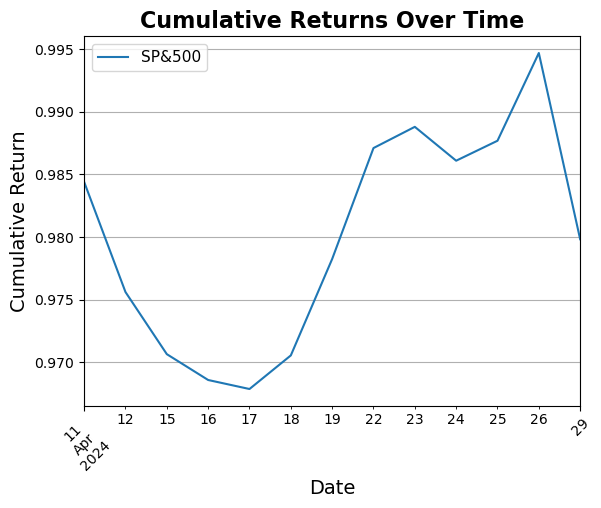

In [89]:
# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [90]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

In [91]:
ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

In [92]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [93]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: -3.06


In [94]:
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((cum_returns['SP&500'].iloc[-1]**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

The CAGR is: -32.63%


In [96]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100

In [138]:
#calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())
#calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).month).last())
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).isocalendar().week).last())

In [140]:
calendar_returns


,SP&500
week,
15,-2.4388
16,-2.1751
17,-0.5301
18,-2.0171


In [142]:
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [week]   (SP&500)

In [112]:
y_test_and_pred = pd.read_csv('test.csv')
y_test_and_pred['Date'] = pd.to_datetime(y_test_and_pred['Date'])
y_test_and_pred.set_index(['Ticker', 'Date'], inplace=True)
y_test_and_pred.rename(columns={'Action':'y_pred'}, inplace=True)
y_test_and_pred = pd.merge(y_test_and_pred, total_returns, left_index=True, right_index=True, how='inner')

In [114]:
y_train_and_pred.describe()

,F_1_d_returns_Ind,1_d_returns,5_d_returns,15_d_returns,20_d_returns,y_pred,F_1_d_returns
count,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000
mean,0.4626,-0.0700,-0.3937,-1.0275,-0.9094,0.0508,-0.0015
std,0.4986,1.1711,1.3027,0.9406,0.8964,0.2196,0.0185
min,0.0000,-32.9839,-16.3410,-10.5862,-8.9493,0.0000,-0.2314
25%,0.0000,-0.5837,-1.1596,-1.5259,-1.3895,0.0000,-0.0103
50%,0.0000,-0.0565,-0.4359,-1.0201,-0.8971,0.0000,-0.0011
75%,1.0000,0.4642,0.3277,-0.4789,-0.4026,0.0000,0.0076
max,1.0000,12.4649,10.5260,5.2337,4.6265,1.0000,0.2017


In [116]:
model_name = 'RL-Model'

In [118]:
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0.5:
        return  1 # Go long
    else:
        return  0  
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 


In [120]:
y_test_and_pred.describe()

,F_1_d_returns_Ind,1_d_returns,5_d_returns,15_d_returns,20_d_returns,y_pred,F_1_d_returns,Position,RL-Model_Return
count,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000,6474.0000
mean,0.4626,-0.0700,-0.3937,-1.0275,-0.9094,0.0508,-0.0015,0.0508,-0.0001
std,0.4986,1.1711,1.3027,0.9406,0.8964,0.2196,0.0185,0.2196,0.0042
min,0.0000,-32.9839,-16.3410,-10.5862,-8.9493,0.0000,-0.2314,0.0000,-0.0825
25%,0.0000,-0.5837,-1.1596,-1.5259,-1.3895,0.0000,-0.0103,0.0000,0.0000
50%,0.0000,-0.0565,-0.4359,-1.0201,-0.8971,0.0000,-0.0011,0.0000,0.0000
75%,1.0000,0.4642,0.3277,-0.4789,-0.4026,0.0000,0.0076,0.0000,0.0000
max,1.0000,12.4649,10.5260,5.2337,4.6265,1.0000,0.2017,1.0000,0.1411


In [122]:
cum_returns.dropna()

,SP&500
Date,
2024-04-11,0.9844
2024-04-12,0.9756
2024-04-15,0.9707
2024-04-16,0.9686
2024-04-17,0.9679
2024-04-18,0.9706
2024-04-19,0.9782
2024-04-22,0.9871
2024-04-23,0.9888


In [134]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 0.15%
Sharpe Ratio of Strategy: 23.76


In [132]:
cagr

0.15

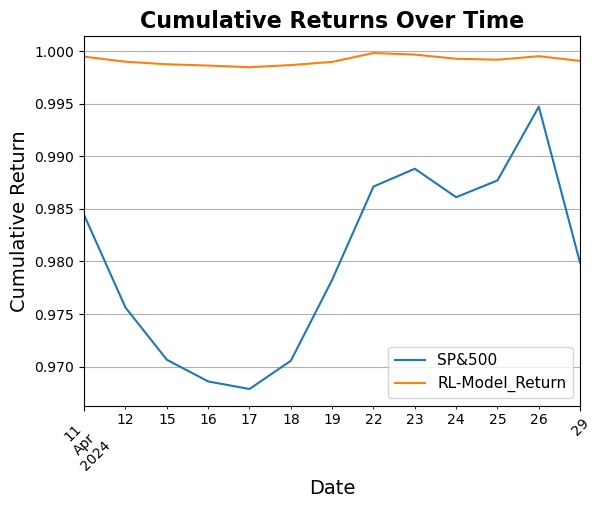

In [126]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()